# # Phone price classification

1. Import Library 

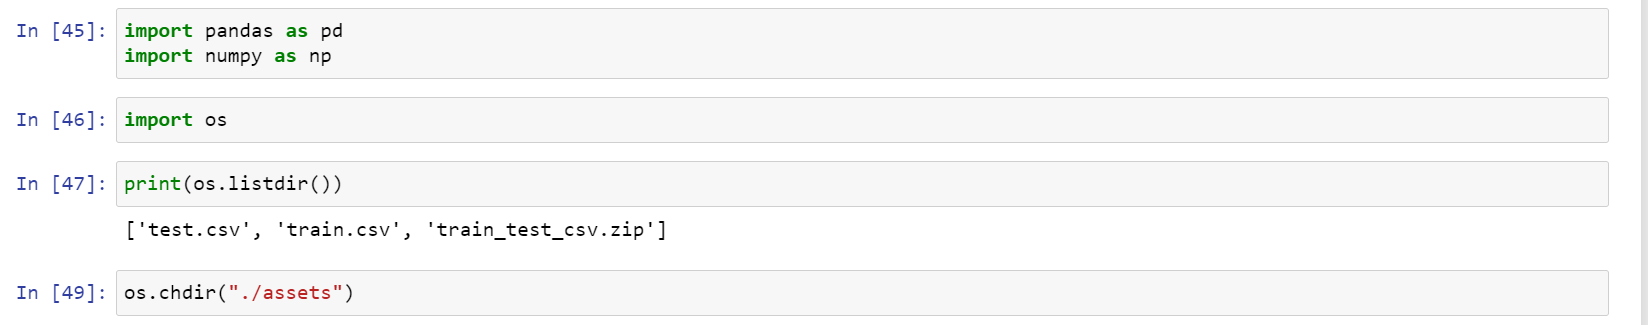

2. import csv data from another folder

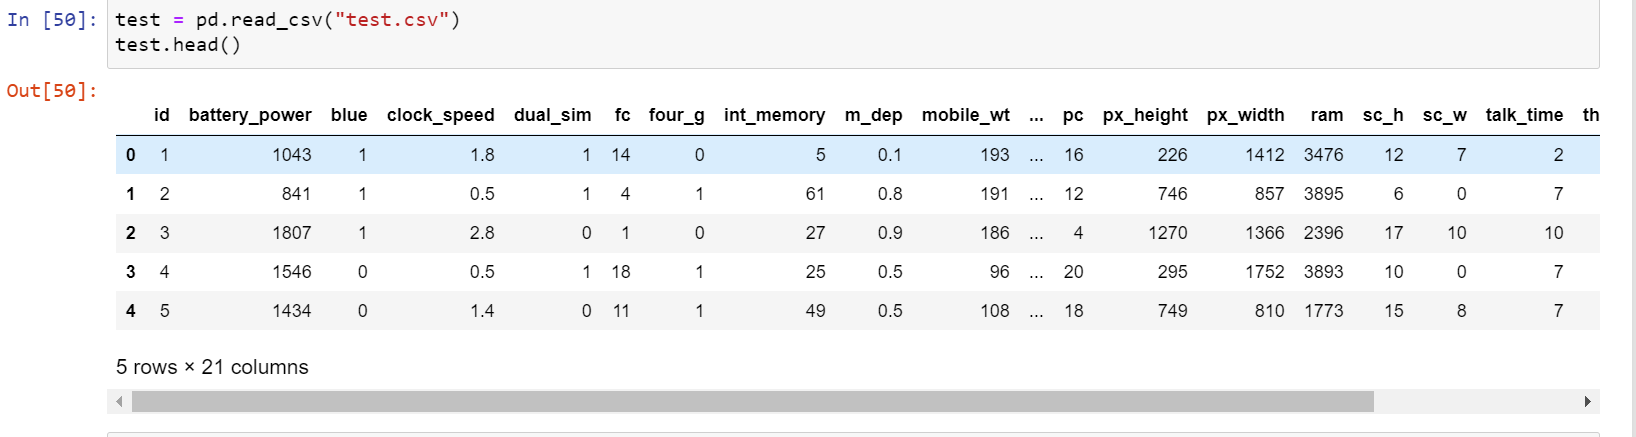

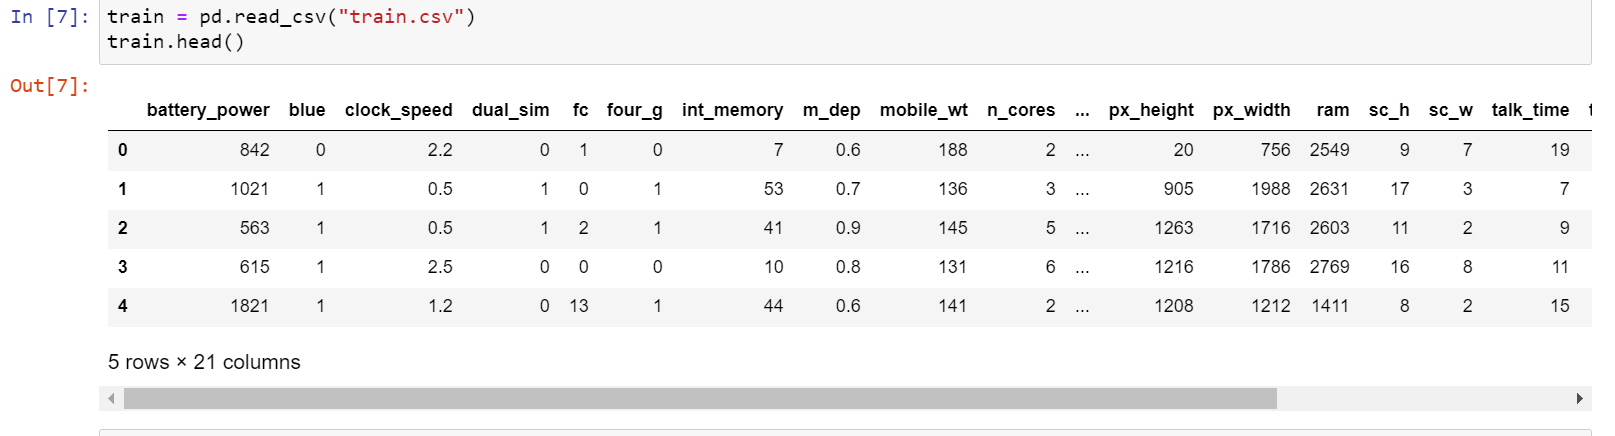

3. create one-hot vector

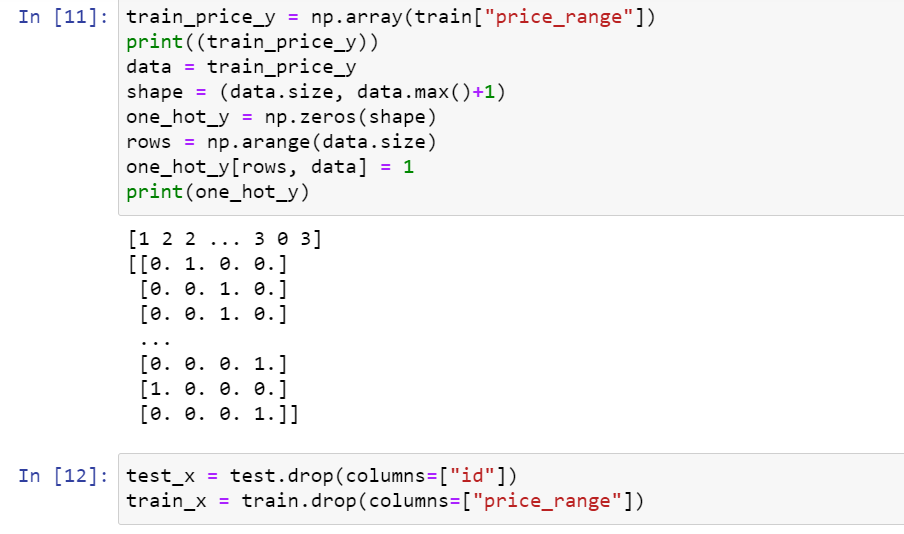

4. train in the wrong way (do not seperate train data from test data)

4.1 Start training model with NeuralNetwork

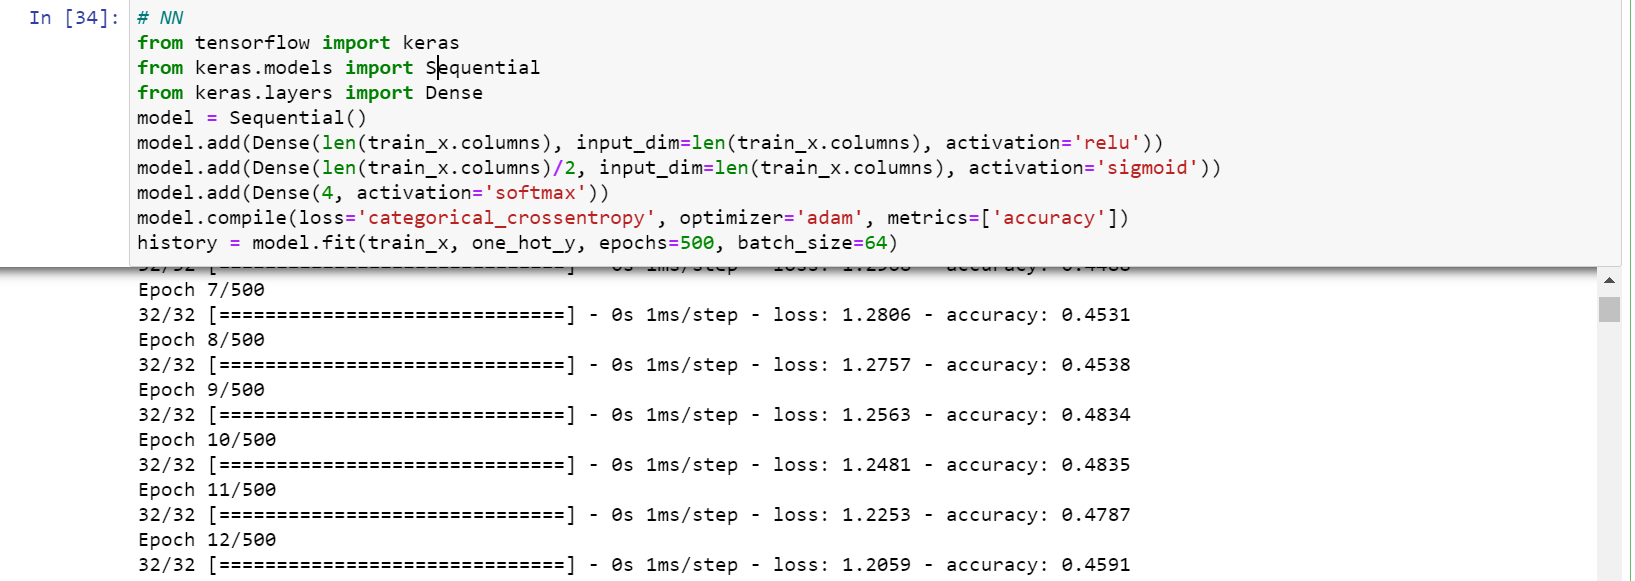

4.1.1 Result of neural network

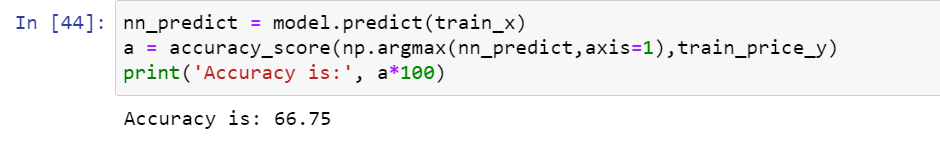

4.2 Train with KNeighborsClassifier

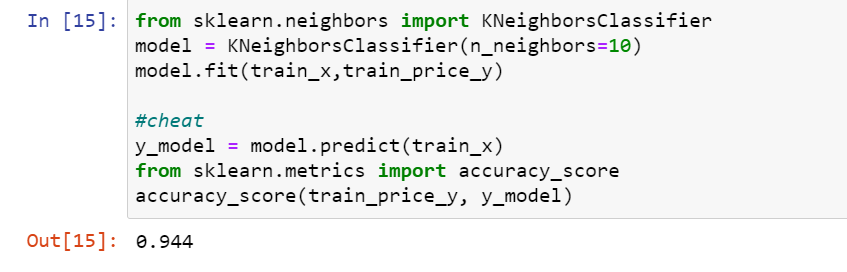

5 Train in the right way (seperating data to train and test)

5.1 Train model with KNeighborsClassifier

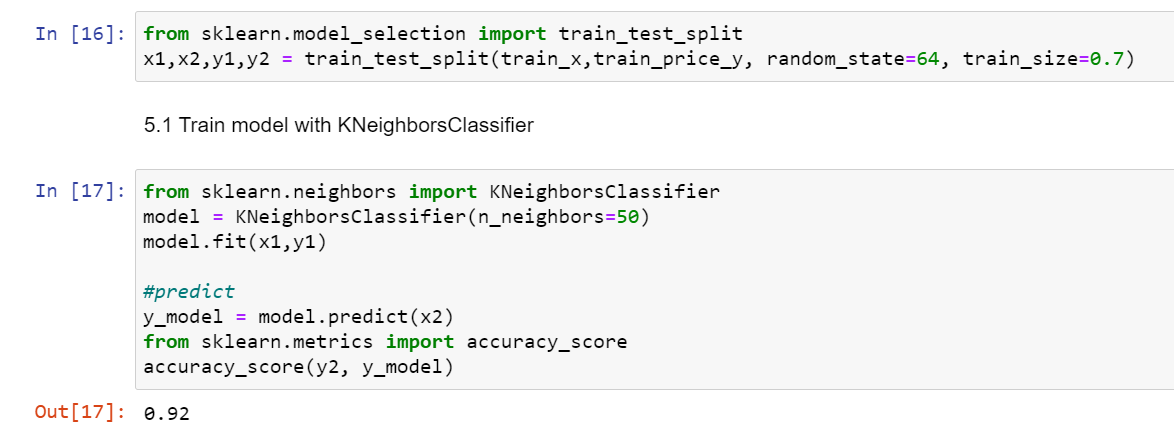

5.1.1 using cross_validation to find the best model

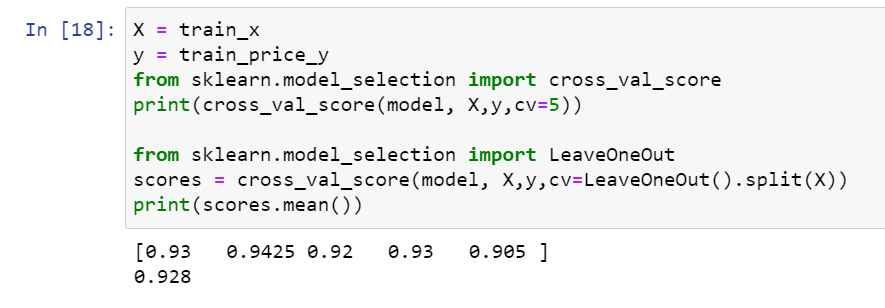

5.1.2 using Grid Search to find a suitable parameter

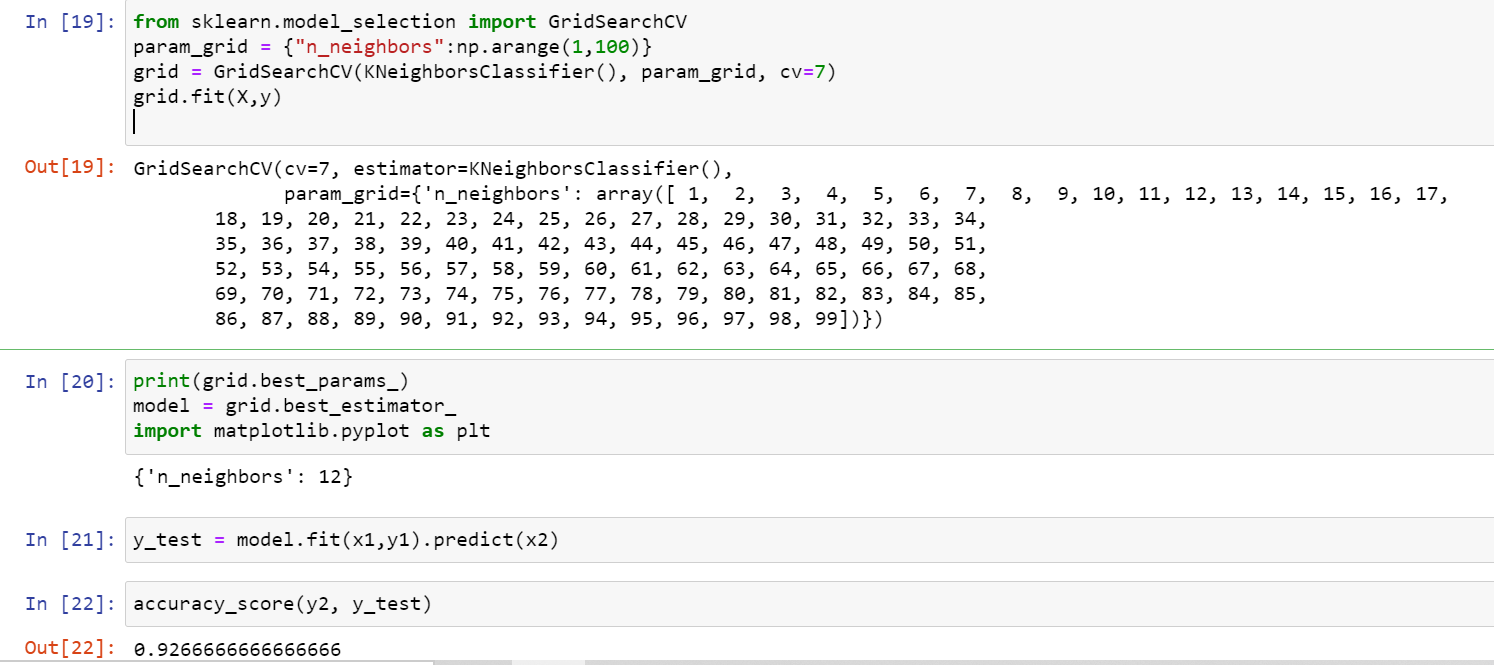

Source code reference:2110446 Data Science and Data engineering (Computer engineering)

5.2 Train model with support vector machine

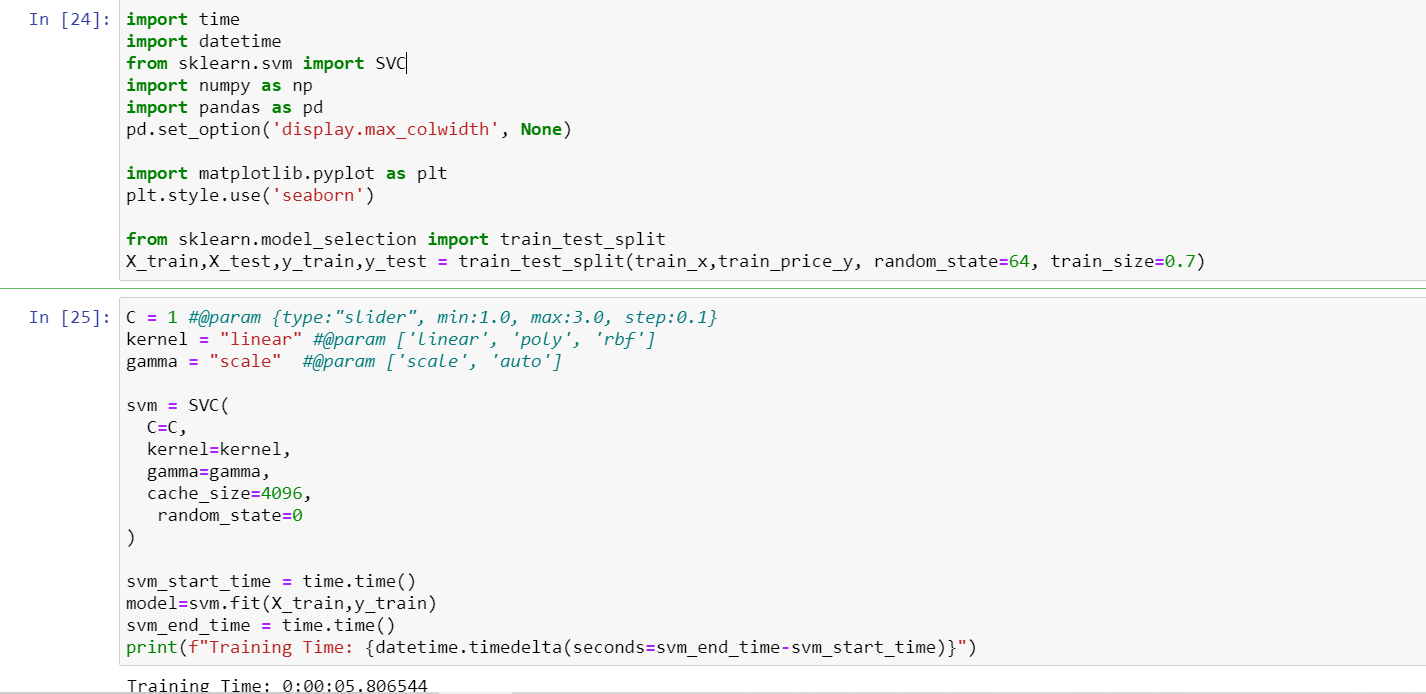

5.2.1 Result of support vector machine

In [26]:
#predict
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9683333333333334

5.2.2 Exploring classification report for analytics

In [27]:
# Predict as Class
train_predict = svm.predict(X_train)
test_predict = svm.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_predict, labels=[1, 0])

array([[143,   1],
       [  2, 141]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.97      0.94      0.96       152
           2       0.93      0.96      0.95       149
           3       0.97      0.99      0.98       156

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [30]:
y_train = np.array(train["price_range"])

5.2.3 pre-processing data for visualization

<ipython-input-31-03ce812a0f18>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


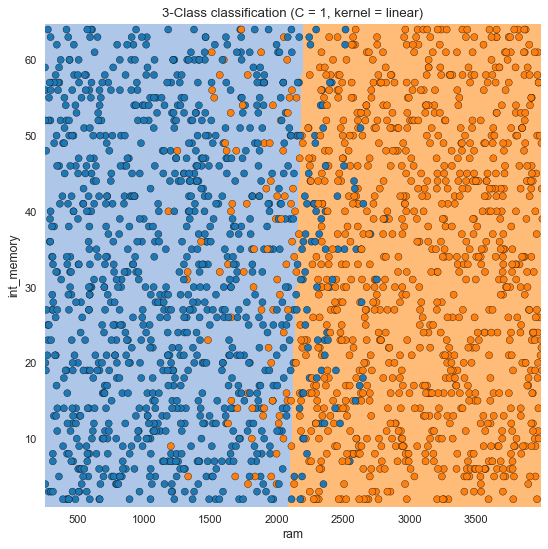

In [31]:
C = 1
kernel = "linear" #@param ['linear', 'poly', 'rbf']
gamma = "scale"

# x_label = 'sepal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# y_label = 'petal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


x_label = 'ram' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
y_label = 'int_memory' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

x_idx = train.columns.to_list().index(x_label)
y_idx = train.columns.to_list().index(y_label)

# Script from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib import cm
from matplotlib.colors import ListedColormap
cmap_val = np.linspace(0.0, 1.0, 20)
cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:5:2])
cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:4:2])
h = 300  # step size in the mesh

model = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
    random_state=0
)
model.fit(train.iloc[:, [x_idx, y_idx]], y_train)
x_min, x_max = train.iloc[:, x_idx].min() - 1, train.iloc[:, x_idx].max() + 1
y_min, y_max = train.iloc[:, y_idx].min() - 1, train.iloc[:, y_idx].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, (x_max-x_min)/h),
  np.arange(y_min, y_max, (y_max-y_min)/h)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(
  train.iloc[:, x_idx],
  train.iloc[:, y_idx],
  c=y_train,
  cmap=cmap_bold,
  edgecolor='k',
  s=40
)
plt.xlabel(x_label)
plt.xlim(xx.min(), xx.max())
plt.ylabel(y_label)
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (C = {C}, kernel = {kernel})")
plt.show()

Reference:https://www.kaggle.com/sercanyesiloz/mobile-price-prediction

5.2.4 Another visualization

In [32]:
! pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=e9600aa91bcefb4cc6f155b34956705b255f17980bc505cc6145a235d8dd3e1b
  Stored in directory: c:\users\mapraw\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [33]:
import plotly.graph_objs as go
from plotly.offline import iplot
train_0 = train[train.price_range == 0]
train_1 = train[train.price_range == 1]
train_2 = train[train.price_range == 2]
train_3 = train[train.price_range == 3]

trace1 =go.Scatter(
                    y = train_0.battery_power,
                    x = train_0.ram,
                    mode = "markers",
                    name = "Price Range: 0",
                    marker = dict(color = 'rgba(240, 136, 200, 0.8)'),
                    text= train_0.price_range)

trace2 =go.Scatter(
                    y = train_1.battery_power,
                    x = train_1.ram,
                    mode = "markers",
                    name = "Price Range: 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= train_1.price_range)

trace3 =go.Scatter(
                    y = train_2.battery_power,
                    x = train_2.ram,
                    mode = "markers",
                    name = "Price Range: 2",
                    marker = dict(color = 'rgba(0, 240, 170, 0.8)'),
                    text= train_2.price_range)

trace4 =go.Scatter(
                    y = train_3.battery_power,
                    x = train_3.ram,
                    mode = "markers",
                    name = "Price Range: 3",
                    marker = dict(color = 'rgba(50, 70, 190, 0.8)'),
                    text= train_3.price_range) 


data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'Ram - Battery Power - Price Range',
              xaxis= dict(title= 'Ram',
                          ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Battery Power',
                          ticklen= 5,zeroline= False),
             autosize=False,
             width=700,
             height=450,)
fig = dict(data = data, layout = layout)
    
iplot(fig)